In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

print("¡Entorno configurado correctamente!")



¡Entorno configurado correctamente!


In [33]:
# Cargar el dataset
data = pd.read_csv('/Users/camilosuazomelendez/Library/Mobile Documents/com~apple~CloudDocs/UNAB/6° Trimestre/Ciencia de Datos/Proyecto Spotify Playlist/Spotify-Data-Project/data/origins.csv')
data.head()


,Track ID,Track Name,Album Name,Artist Name(s),Release Date,Duration (ms),Popularity,Added By,Added At,Genres,...,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature
0,5Eg4TsPcqNbIjd8ADMZosg,Chains,Nick Jonas X2,Nick Jonas,2015-11-20,203106,55,95fvnclitpzdbgd83xcozdsk2,2024-11-29T00:19:04Z,"dance pop,pop",...,0,-5.884,0,0.0454,0.0153,0.000000,0.0757,0.120,76.003,4
1,3V3iy4K6paycRmTyrjQVwi,Secrets,Heart On My Sleeve (Deluxe),Mary Lambert,2014-10-14,223405,39,95fvnclitpzdbgd83xcozdsk2,2024-11-29T00:19:04Z,neo mellow,...,0,-5.900,1,0.0410,0.0260,0.000135,0.2150,0.713,93.229,4
2,2f0GI2ZLUtbGqFx8t2Gk6A,I Know Places (Taylor's Version),1989 (Taylor's Version),Taylor Swift,2023-10-26,195700,63,95fvnclitpzdbgd83xcozdsk2,2024-11-29T00:19:04Z,pop,...,0,-5.348,1,0.0574,0.0846,0.000000,0.0710,0.626,160.015,4
3,2Od3Imc5PJeZhRPeIhpgN6,Delta 1406,31 Minutes to Takeoff,Mike Posner,2010-08-09,184546,19,95fvnclitpzdbgd83xcozdsk2,2024-11-29T00:19:04Z,"dance pop,pop,pop dance,pop rap",...,1,-7.334,1,0.0451,0.0138,0.000461,0.1210,0.205,87.043,4
4,5hw1uOFZK3odNqXa4sF2JZ,Stay With Me - Re-record,In The Lonely Hour (10th Anniversary Edition /...,Sam Smith,2024-08-30,172760,38,95fvnclitpzdbgd83xcozdsk2,2024-11-29T00:19:04Z,"pop,uk pop",...,0,-7.121,1,0.0411,0.5550,0.000041,0.1030,0.246,84.837,4


$$Estructura$$

In [35]:
data.shape


(265, 23)

In [37]:
data.dtypes


Track ID                 object
Track Name               object
Album Name               object
Artist Name(s)           object
Release Date             object
Duration (ms)             int64
Popularity                int64
Added By                 object
Added At                 object
Genres                   object
Record Label             object
\t\t\t\tDanceability    float64
Energy                  float64
Key                       int64
Loudness                float64
Mode                      int64
Speechiness             float64
Acousticness            float64
Instrumentalness        float64
Liveness                float64
Valence                 float64
Tempo                   float64
Time Signature            int64
dtype: object

In [39]:
data.describe()

,Duration (ms),Popularity,\t\t\t\tDanceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature
count,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000
mean,219547.588679,31.713208,0.533826,0.622004,5.509434,-6.840958,0.630189,0.049629,0.259946,0.030620,0.161071,0.395371,117.955019,3.947170
std,38044.365353,20.982695,0.133051,0.171945,3.521700,2.406411,0.483667,0.033471,0.286262,0.131287,0.100932,0.200747,35.979480,0.375683
min,127931.000000,0.000000,0.174000,0.152000,0.000000,-16.550000,0.000000,0.024300,0.000013,0.000000,0.030400,0.037000,65.527000,1.000000
25%,195320.000000,15.000000,0.442000,0.524000,2.000000,-7.937000,0.000000,0.031700,0.019800,0.000000,0.097300,0.230000,88.003000,4.000000
50%,218040.000000,31.000000,0.536000,0.637000,6.000000,-6.353000,1.000000,0.038900,0.121000,0.000011,0.118000,0.384000,100.102000,4.000000
75%,238266.000000,47.000000,0.620000,0.766000,8.000000,-5.254000,1.000000,0.052300,0.443000,0.000575,0.190000,0.521000,151.977000,4.000000
max,485333.000000,83.000000,0.890000,0.970000,11.000000,-1.395000,1.000000,0.284000,0.935000,0.942000,0.692000,0.975000,201.998000,5.000000


In [41]:
data.sample(5)

,Track ID,Track Name,Album Name,Artist Name(s),Release Date,Duration (ms),Popularity,Added By,Added At,Genres,...,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature
200,6w8ZPYdnGajyfPddTWdthN,Can I Get It,30,Adele,2021-11-19,210384,65,95fvnclitpzdbgd83xcozdsk2,2024-11-29T00:19:04Z,"british soul,pop,pop soul,uk pop",...,9,-6.118,0,0.0431,0.01710,0.000000,0.1780,0.536,97.985,4
63,3yhaZuYWuchft2wVEXIMY9,It's Better To Have Loved,The Invisible Line,temposhark,2007-07-16,217880,9,95fvnclitpzdbgd83xcozdsk2,2024-11-29T00:19:04Z,NaN,...,2,-8.908,0,0.0361,0.37500,0.024400,0.1010,0.398,159.872,4
81,1eslc3Gyrhv4jL3qGCb07f,Metropolis,Metropolis,Peter Cincotti,2012-01-01,264640,0,95fvnclitpzdbgd83xcozdsk2,2024-11-29T00:19:04Z,"contemporary vocal jazz,vocal jazz",...,8,-5.264,0,0.0360,0.05320,0.000005,0.3420,0.370,84.041,4
87,1cOSNO1QvjVr2OF0KTRsej,Lonely Hearts,Paranoia,Lee DeWyze,2018-02-16,215854,5,95fvnclitpzdbgd83xcozdsk2,2024-11-29T00:19:04Z,idol,...,3,-6.132,1,0.0249,0.74500,0.000051,0.1270,0.384,138.087,4
245,5lkBW1DMSQAZ6T2C1Ugwml,Island,"For a Moment, I Was Lost",Amber Run,2017-02-10,234720,0,95fvnclitpzdbgd83xcozdsk2,2024-11-29T00:19:04Z,indie anthem-folk,...,9,-7.025,1,0.0428,0.00383,0.006120,0.0919,0.301,169.823,4


$$Inspección de Datos Faltantes y Duplicados$$

In [53]:
data.isnull().sum()

Track ID                 0
Track Name               0
Album Name               0
Artist Name(s)           0
Release Date             0
Duration (ms)            0
Popularity               0
Added By                 0
Added At                 0
Genres                  24
Record Label             0
\t\t\t\tDanceability     0
Energy                   0
Key                      0
Loudness                 0
Mode                     0
Speechiness              0
Acousticness             0
Instrumentalness         0
Liveness                 0
Valence                  0
Tempo                    0
Time Signature           0
dtype: int64

In [57]:
data.duplicated().sum()

0

$$Inspección de Columnas Clave$$

In [62]:
data['Album Name'].value_counts()

Album Name
Take Me To The Disco                            4
Nick Jonas X2                                   3
All the Lost Souls                              3
Postcards in the Sky                            3
THE TORTURED POETS DEPARTMENT: THE ANTHOLOGY    3
                                               ..
Red River Blue (Deluxe Edition)                 1
Sacred Hearts Club                              1
SEX AND LOVE (Deluxe)                           1
- (Deluxe)                                      1
S P E Y S I D E                                 1
Name: count, Length: 232, dtype: int64

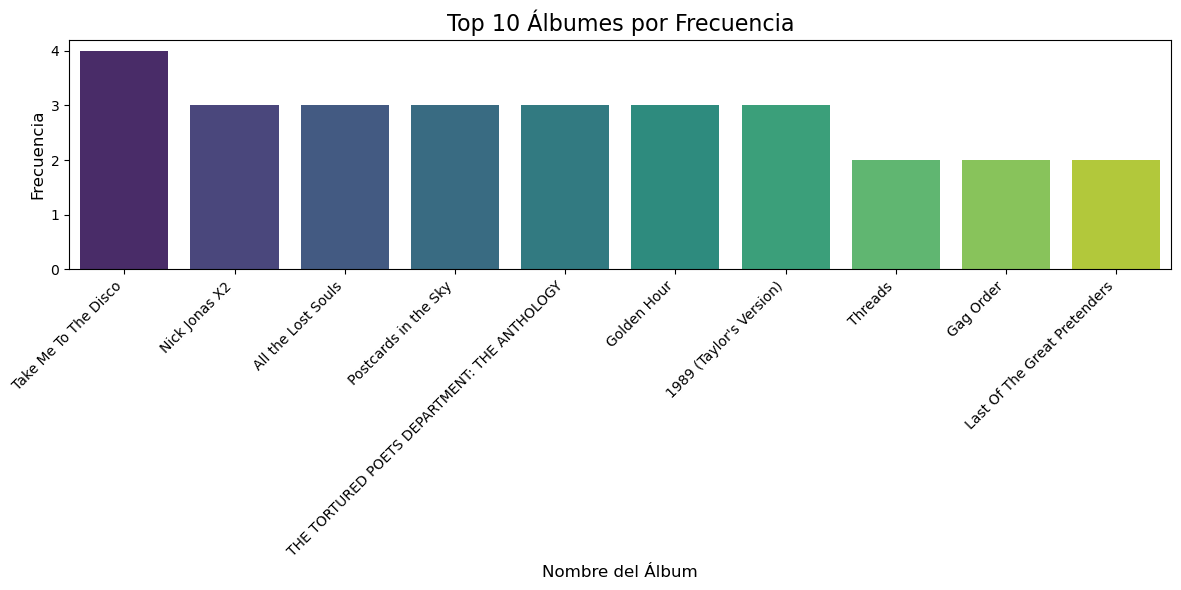

In [74]:
# Mostrar los 10 álbumes más frecuentes
top_albums = album_counts.head(10)


# Gráfico con colores dinámicos
plt.figure(figsize=(12, 6))
sns.barplot(x=top_albums.index, y=top_albums.values, palette='viridis')
plt.title('Top 10 Álbumes por Frecuencia', fontsize=16)
plt.xlabel('Nombre del Álbum', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()
